<a href="https://colab.research.google.com/github/khj0917000/khj0917/blob/master/%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

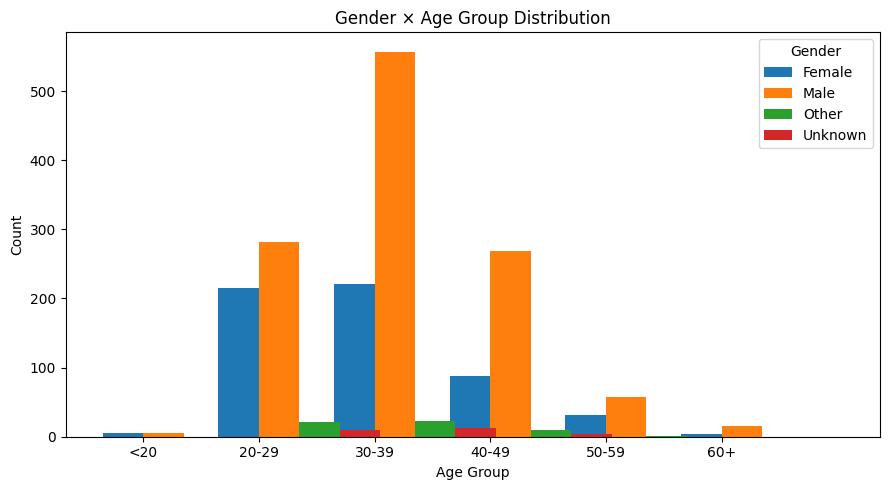

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/df_gender_cleaned.csv")

# 2. 연령대 그룹 생성
bins = [0, 20, 30, 40, 50, 60, 120]
labels = ["<20", "20-29", "30-39", "40-49", "50-59", "60+"]

df["Age_group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# 3. Gender × Age_group 교차표 생성
ct = pd.crosstab(df["Age_group"], df["Gender"])

# 4. 그래프 그리기
plt.figure(figsize=(9, 5))

x = np.arange(len(ct.index))   # 연령대 구간
width = 0.35                   # 막대 너비

# gender가 2개 이상일 수 있으므로 반복 처리
for i, gender in enumerate(ct.columns):
    plt.bar(x + i*width, ct[gender], width, label=gender)

# 5. 그래프 라벨링
plt.title("Gender × Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(x + width/2, ct.index)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

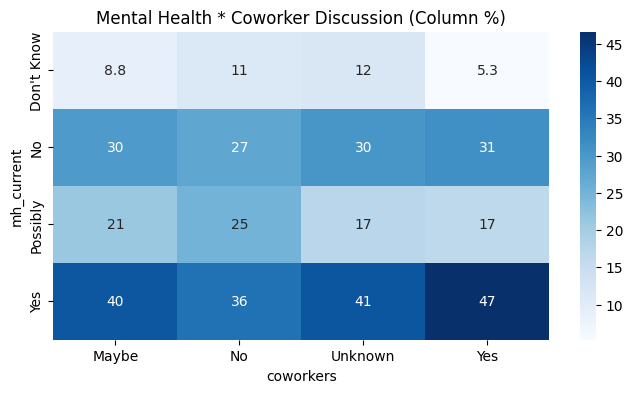

In [3]:
import pandas as pd

# df_missing_handled.csv 파일을 로드하여 df 변수 정의
df = pd.read_csv("/content/df_gender_cleaned.csv")

# 동료와 대화 가능성(coworkers) 및 현재 정신건강 상태(mh_current)
pd.crosstab(df["mh_current"], df["coworkers"])

# 열(column) 비율 기준
pd.crosstab(df["mh_current"], df["coworkers"], normalize='columns') * 100
# 행(row) 비율 기준
pd.crosstab(df["mh_current"], df["coworkers"], normalize='index') * 100
# 총 비율(normalize='all')
pd.crosstab(df["mh_current"], df["coworkers"], normalize='all') * 100

# 교차표 + 합계(margins=True)
pd.crosstab(df["mh_current"], df["coworkers"], margins=True)

# 다중 변수 교차표 (supervisors 포함)
pd.crosstab(df["mh_current"], [df["coworkers"], df["supervisors"]])

# 여러 교차표 한 번에 만들기 (딕셔너리 형태)
cols = ["coworkers", "supervisors", "Gender", "family_history"]
crosstabs = {}
for col in cols:
    crosstabs[col] = pd.crosstab(df["mh_current"], df[col], dropna=False)

crosstabs   # 출력

# 교차표 + Heatmap(시각화)
import seaborn as sns
import matplotlib.pyplot as plt

ct = pd.crosstab(df["mh_current"], df["coworkers"], normalize='columns') * 100

plt.figure(figsize=(8,4))
sns.heatmap(ct, annot=True, cmap="Blues")
plt.title("Mental Health * Coworker Discussion (Column %)")
plt.show()

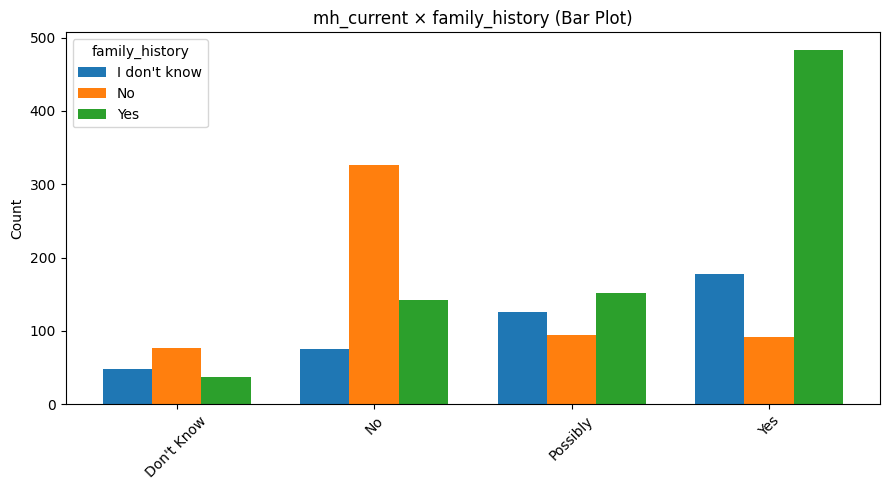

In [4]:
df = pd.read_csv("/content/df_gender_cleaned.csv")

# -----------------------------
# 1) mh_current × family_history
# -----------------------------
ct_family = pd.crosstab(df["mh_current"], df["family_history"], dropna=False)

groups = ct_family.index
categories = ct_family.columns
x = np.arange(len(groups))
width = 0.25   # bar width

plt.figure(figsize=(9,5))
for i, cat in enumerate(categories):
    plt.bar(x + i*width, ct_family[cat], width, label=str(cat))

plt.xticks(x + width, groups, rotation=45)
plt.ylabel("Count")
plt.title("mh_current × family_history (Bar Plot)")
plt.legend(title="family_history")
plt.tight_layout()
plt.show()



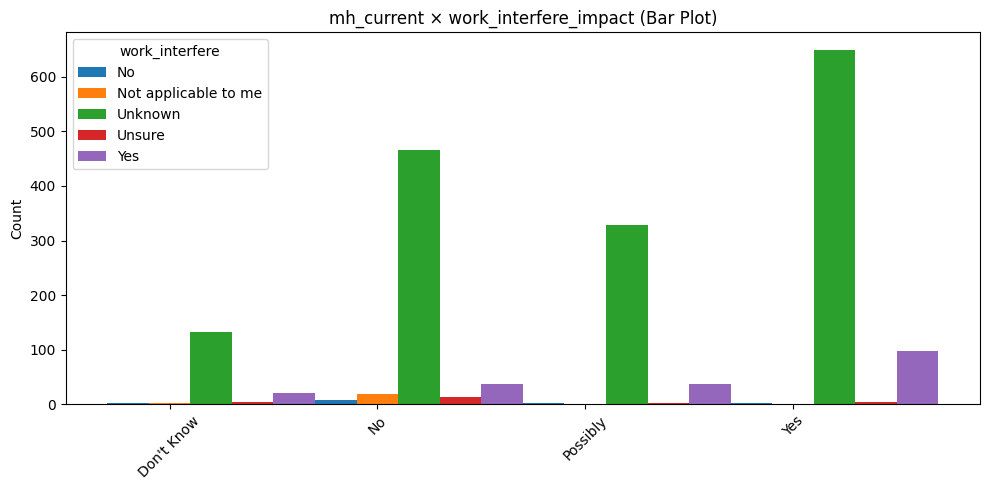

In [5]:

# ------------------------------------------
# 2) mh_current × work_interfere_impact
# ------------------------------------------
ct_work = pd.crosstab(df["mh_current"], df["work_interfere_impact"], dropna=False)

groups2 = ct_work.index
categories2 = ct_work.columns
x2 = np.arange(len(groups2))
width2 = 0.2

plt.figure(figsize=(10,5))
for i, cat in enumerate(categories2):
    plt.bar(x2 + i*width2, ct_work[cat], width2, label=str(cat))

plt.xticks(x2 + width2, groups2, rotation=45)
plt.ylabel("Count")
plt.title("mh_current × work_interfere_impact (Bar Plot)")
plt.legend(title="work_interfere")
plt.tight_layout()
plt.show()